In [1]:

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
baseDir = 'E:/School/Winter 2023/Data Science 2/assignments/archive/'
trainDir = baseDir + 'train'
valDir = baseDir + 'valid'
testDir = baseDir + 'test'

In [3]:
batchSize = 32
height = 224
width = 224
classes = 515


In [4]:
train_dataset = image_dataset_from_directory(
    trainDir,
    labels = 'inferred',
    label_mode='categorical',
    image_size=(height, width),
    batch_size=batchSize,
)
test_dataset = image_dataset_from_directory(
    testDir,
    labels = 'inferred',
    label_mode='categorical',
    image_size=(height, width),
    batch_size=batchSize,
)
val_dataset = image_dataset_from_directory(
    valDir,
    labels = 'inferred',
    label_mode='categorical',
    image_size=(height, width),
    batch_size=batchSize,
)
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Found 82724 files belonging to 515 classes.
Found 2575 files belonging to 515 classes.
Found 2575 files belonging to 515 classes.


In [5]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="birds.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        # layers.RandomRotation(0.1),
        # layers.RandomZoom(0.2),
    ]
)

In [35]:
conv_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(height, width, 3))
conv_base.trainable = False

In [38]:
# conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(height, width, 3))
# conv_base.trainable = True
# for layer in conv_base.layers[:-4]:
#     layer.trainable = False

In [ ]:
conv_base.summary()

In [43]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(height, width, 3)),
    data_augmentation,
    tf.keras.layers.Lambda(keras.applications.inception_v3.preprocess_input, input_shape=(height, width, 3)),
    conv_base,
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1024, activation="relu"),
    layers.Dense(classes, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
# optimizer="rmsprop",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])

In [41]:

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 lambda_8 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_8 (Dropout)         (None, 51200)             0         
                                                                 
 dense_13 (Dense)            (None, 1024)              52429824  
                                                                 
 dense_14 (Dense)            (None, 515)              

In [44]:
history = model.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks=callbacks)

Epoch 1/30
2586/2586 [==============================] - 448s 171ms/step - loss: 3.3098 - accuracy: 0.3326 - val_loss: 1.1651 - val_accuracy: 0.7045
Epoch 2/30
2586/2586 [==============================] - 442s 171ms/step - loss: 1.4386 - accuracy: 0.6428 - val_loss: 0.7314 - val_accuracy: 0.8070
Epoch 3/30
2586/2586 [==============================] - 445s 172ms/step - loss: 1.0174 - accuracy: 0.7392 - val_loss: 0.5696 - val_accuracy: 0.8404
Epoch 4/30
2586/2586 [==============================] - 442s 171ms/step - loss: 0.7862 - accuracy: 0.7937 - val_loss: 0.5046 - val_accuracy: 0.8586
Epoch 5/30
2586/2586 [==============================] - 440s 170ms/step - loss: 0.6445 - accuracy: 0.8266 - val_loss: 0.4746 - val_accuracy: 0.8645
Epoch 6/30
2586/2586 [==============================] - 412s 159ms/step - loss: 0.5323 - accuracy: 0.8554 - val_loss: 0.4355 - val_accuracy: 0.8816
Epoch 7/30
2586/2586 [==============================] - 389s 150ms/step - loss: 0.4437 - accuracy: 0.8780 - val_

In [30]:
model = keras.models.load_model("birds.keras")

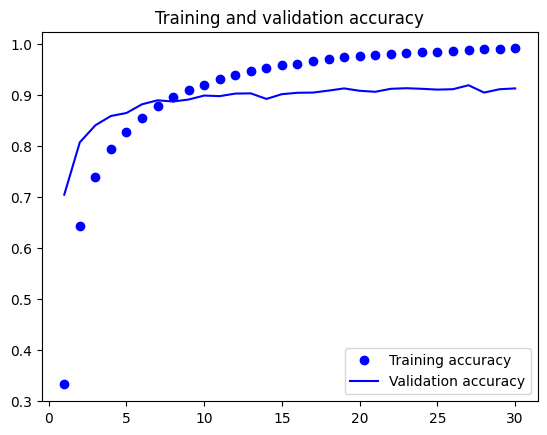

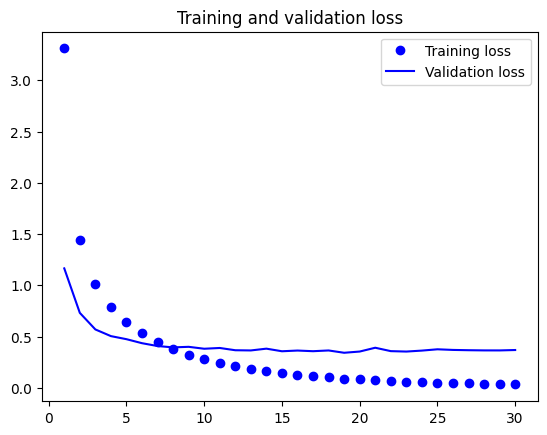

In [45]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [46]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

81/81 [==============================] - 11s 134ms/step - loss: 0.2847 - accuracy: 0.9336
Test accuracy: 0.934
